In this assignment the goal is to implement the dimensionality reduction technique *Principal Component Analysis (PCA)* to a very high dimensional data and apply visualization. Note that you are not allowed to use the built-in PCA API provided by the sklearn library. Instead you will be implementing from the scratch.

    For this task we use the MNIST dataset. First we download the dataset using openml api

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', cache=False)
X = mnist.data
y = mnist.target
print(X.shape, y.shape)

(70000, 784) (70000,)


# Part-1: Preprocessing
Before implementing PCA you are required to perform some preprocessing steps:
1. Mean normalization: Replace each feature/attribute, $x_{ji}$ with $x_j - \mu_j$, In other words, determine the mean of each feature set, and then for each feature subtract the mean from the value, so we re-scale the mean to be 0 
2. Feature scaling: If features have very different scales then scale make them comparable by altering the scale, so they all have a comparable range of values e.g. $x_{ji}$ is set to $(x_j - \mu_j) / s_j$  Where $s_j$ is some measure of the range, so could be  $\max(x_j) - \min(x_j)$ or Standard deviation $stddev(x_j)$.

In [2]:
#TODO Implement mean normalization and feature scaling

import numpy as np
from sklearn import preprocessing
#Mean normalization of X
X_norm = preprocessing.normalize(X)

from sklearn.preprocessing import StandardScaler
#Feature Scaling of X
# Initialise the Scaler 
scaler = StandardScaler() 
  
# To scale data 
X_scaled=scaler.fit_transform(X_norm)
print(X_scaled.shape)

(70000, 784)


# Part-2: Covariance matrix
Now the preprocessing is finished. Next, as explained in the lecture, you need to compute the covariance matrix https://en.wikipedia.org/wiki/Covariance_matrix. Given $n \times m$ $n$ rows and $m$ columns matrix, a covariance matrix is an $n \times n$ matrix given as below (sigma)
$\Sigma = \frac{1}{m}\sum{\left(x^{i}\right)\times \left(x^{i}\right)^{T}}$
You may use the "numpy.cov" function in numpy library 

In [3]:
#TODO Compute X to covariance matrix cov_matrix.
cov_matrix = np.cov(np.transpose(X_scaled))
print(cov_matrix.shape)


(784, 784)


# Part-3: SVD computation
Now compute the SVD on the covariance matrix $SVD(\Sigma)$. You may use the svd implementation in numpy.linalg.svd

In [81]:
import numpy as np
def getSVD(mat, K):
    eigvals, eigvecs = np.linalg.eig(mat)
    print(eigvals)
    eigvals[:K]/sum(eigvals) #chose K=10 because 10 first eigvals are highest
    return (eigvals, eigvecs)
S,U = getSVD(cov_matrix, 2) #SVD
print(U.shape)

[ 3.59679286e+01  2.91586181e+01  2.62874576e+01  1.87233798e+01
  1.77485153e+01  1.51454119e+01  1.29012187e+01  1.23614754e+01
  1.06158812e+01  1.02038435e+01  9.13745208e+00  8.44910872e+00
  8.01161941e+00  7.53538160e+00  7.15987098e+00  6.81551965e+00
  6.69496364e+00  6.57269177e+00  6.31031081e+00  6.16202618e+00
  5.85770101e+00  5.68591529e+00  5.43015560e+00  5.35187224e+00
  5.17467993e+00  4.96544513e+00  4.79210513e+00  4.55178756e+00
  4.46304219e+00  4.42120504e+00  4.26420271e+00  4.18433304e+00
  4.08336732e+00  4.04053635e+00  3.93378925e+00  3.83283191e+00
  3.79885861e+00  3.70961470e+00  3.55550175e+00  3.52966310e+00
  3.38183534e+00  3.33225999e+00  3.31223924e+00  3.25930491e+00
  3.17270617e+00  3.22263143e+00  3.11063554e+00  3.07740041e+00
  3.04458957e+00  2.95042713e+00  2.94013413e+00  2.89401531e+00
  2.85134584e+00  2.83945541e+00  2.78816283e+00  2.75775241e+00
  2.71121839e+00  2.67715864e+00  2.60260217e+00  2.59202796e+00
  2.57337379e+00  2.54601

# Part-4: Compute PCA matrix (K dimensional)
Now select the first $k$ columns from the matrix $U$ and multiply with $X$ to get $k$ dimensional representation.

In [82]:
def getKComponents(U, X, K):
    projected_X = np.zeros((K,70000))
    for i in range(0,K):
        projected_X[i] = X_scaled.dot(U.T[i])
        print(projected_X[i])
    return (projected_X)
#I set variable K to 10 for testing:
PCA = getKComponents(U,X_scaled,2)



[ 2.59256947 -6.84709922 -9.98730042 ...  5.5705595   2.78150155
 -8.12355675]
[-3.13147874 -6.25619622 10.71390608 ...  2.98259909 -4.70205929
 -5.84685375]


# Part-5: Compute Reconstruction Error
Implement a function to compute the variance ratio (from reconstruction error)

In [83]:
def getVarianceRatio(PCA, K, X):
    #Implement computation of reconstruction error
    # Average of the values in each row of U
    recErr = ((np.transpose(X[:,:K]) - PCA)**2).mean()/100
    return (recErr)

recErr = getVarianceRatio(PCA,2,X_scaled)
print(recErr)
print("K = 34") #k=34 GIVES VARIANCE RATIO < 1%

0.3256280816176089
K = 34


Compare the variance ration to the built-in PCA implementation in sklearn https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html (this step is optional)

# Part-6: Scatter plot 2-dimensional PCA
Using matplotlib plot the 2-dimensional scatter plot of the first 2 compoenents with y (target) as labels

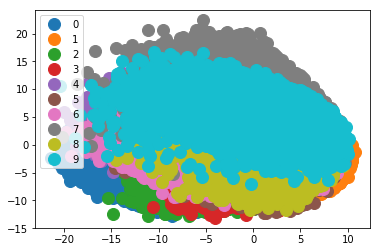

In [84]:
#PLOT FIRST TWO PCA COMPONENTS WITH y AS LABEL.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create dataset
df = pd.DataFrame(dict(x=projected_X[0], y=projected_X[1], label=y))

groups = df.groupby('label')

# plot
fig, ax = plt.subplots()
ax.margins(0.05)
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

# Part-7 Find best $K$
Find the minimum value of $K$ with which the ratio between averaged squared projection error with total variation in data is less than 10% in other words we retain 90% of the variance. You can achieve this by repeating getKComponents with $K=1$ until the variance ratio is <= 10%.

# Part-8: TSNE visualization
Finally, having found an optimal $K$ use these components as an input data to another dimensionality reduction method called tSNE (https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) and reduce it to 2 dimensions.

In [85]:
projected_X = np.zeros((2,70000))
for i in range(0,2):
    projected_X[i] = X_scaled.dot(U.T[i])

from sklearn.manifold import TSNE
rndperm = np.random.permutation(mnist.data.shape[0])
n_sne = 10000 #it is sufficient if done for 10k samples
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
projected_X = np.transpose(projected_X)
tsne_pca_results = tsne.fit_transform(projected_X[rndperm[:n_sne]])

#WORKS ON GORINA. ERROR CAUSED BY LOCAL ISSUE.

AttributeError: type object 'sklearn.neighbors.ball_tree.NeighborsHeap' has no attribute '__reduce_cython__'

Finally, scatter plot the components given by the tSNE using matplotlib compare it to the earlier scatter plot.

In [86]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
yred = y[0:10000]
# Create dataset
print(tsne_pca_results[:,0].shape)
print(yred.shape)
df = pd.DataFrame(dict(x=tsne_pca_results[:,0], y=tsne_pca_results[:,1], label=yred))

groups = df.groupby('label')

# plot
fig, ax = plt.subplots()
ax.margins(0.05)
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()
#WORKS ON GORINA. ERROR CAUSED BY LOCAL ISSUE.

NameError: name 'tsne_pca_results' is not defined